# Mapping Model Results by Cluster

In [12]:


%matplotlib inline

import geopandas as gpd
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression

In [13]:
# Merge shapefiles into single GeoPandas DataFrame
file = os.listdir('./data/shapefiles')
path = [os.path.join('./data/shapefiles', i) for i in file if i.endswith('.shp')]  # https://stackoverflow.com/questions/48874113/concat-multiple-shapefiles-via-geopandas

gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path],
                                 ignore_index = True), crs = gpd.read_file(path[0]).crs)

In [104]:
# Keep only US states
gdf = gdf.loc[~gdf['STATEFP10'].isin(['60','66','69','72','78'])]

In [106]:
# Convert to numerics
gdf.loc[:,'tract'] = gdf.loc[:,'GEOID10'].str.lstrip("0").astype(np.int64) 
gdf.loc[:,'lat'] = gdf.loc[:,'INTPTLAT10'].str.strip("+").astype(float)
gdf.loc[:,'lon'] = gdf.loc[:,'INTPTLON10'].str.strip("-").astype(float) * -1

In [107]:
# Load US Census Data
census = pd.read_csv("data/census.csv", index_col = 0)
census.head()

CensusTract    State   County  Urban  POP2010  OHU2010  GroupQuartersFlag  \
0   1001020100  Alabama  Autauga      1     1912      693                  0   
1   1001020200  Alabama  Autauga      1     2170      743                  0   
2   1001020300  Alabama  Autauga      1     3373     1256                  0   
3   1001020400  Alabama  Autauga      1     4386     1722                  0   
4   1001020500  Alabama  Autauga      1    10766     4082                  0   

   NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  TractBlack  TractAsian  \
0         0  0.000000                  0  ...         217          14   
1       181  0.083410                  0  ...        1217           5   
2         0  0.000000                  0  ...         647          17   
3         0  0.000000                  0  ...         193          18   
4       181  0.016812                  0  ...        1437         296   

   TractNHOPI  TractAIAN  TractOMultir  TractHispanic  TractHUNV  TractSNAP  \
0           0         14            45             44         26        112   
1           0          5            55             75         87        202   
2           5         11           117             87        108        120   
3           4         11            74             85         19         82   
4           9         48           310            355        198        488   

   la_flag  fd_flag  
0        1        0  
1        1        0  
2        1        0  
3        1        0  
4        1        0  

[5 rows x 149 columns]

In [108]:
# Merge Census Data and Shapefiles
census = census.merge(gdf, left_on='CensusTract', right_on='tract')

In [109]:
# Clustering our Points geographically
location_data = census[['lat', 'lon']]
# Create 20 clusters and add back to census data
km = KMeans(n_clusters=20, random_state = 1776)
km.fit(location_data)
clusters = km.predict(location_data)
census.loc[:,'clusters'] = clusters

In [73]:
# Separate Alaska and Hawaii for easier visualization
alaska = census[census['State'] == "Alaska"]
hawaii = census[census['State'] == 'Hawaii']
mainland = census[(census.State != "Hawaii") & (merge.State != "Alaska")]

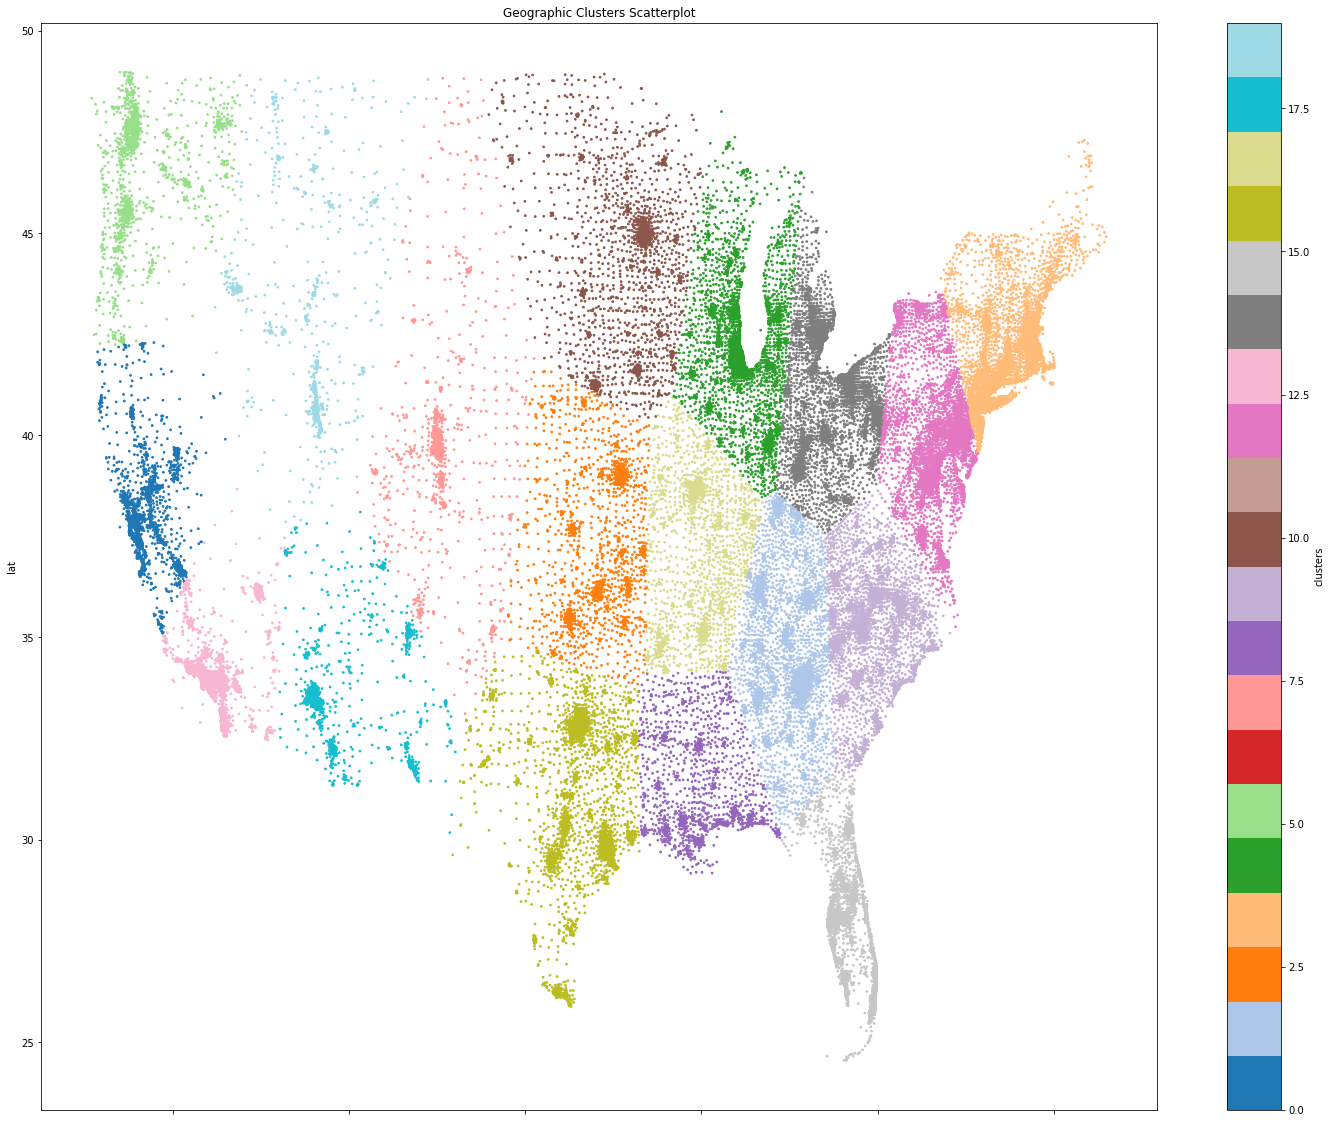

In [74]:
mainland.plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'clusters',
              cmap = 'tab20',
              title = 'Geographic Clusters Scatterplot',
              s = 3,
              figsize = (25,20));

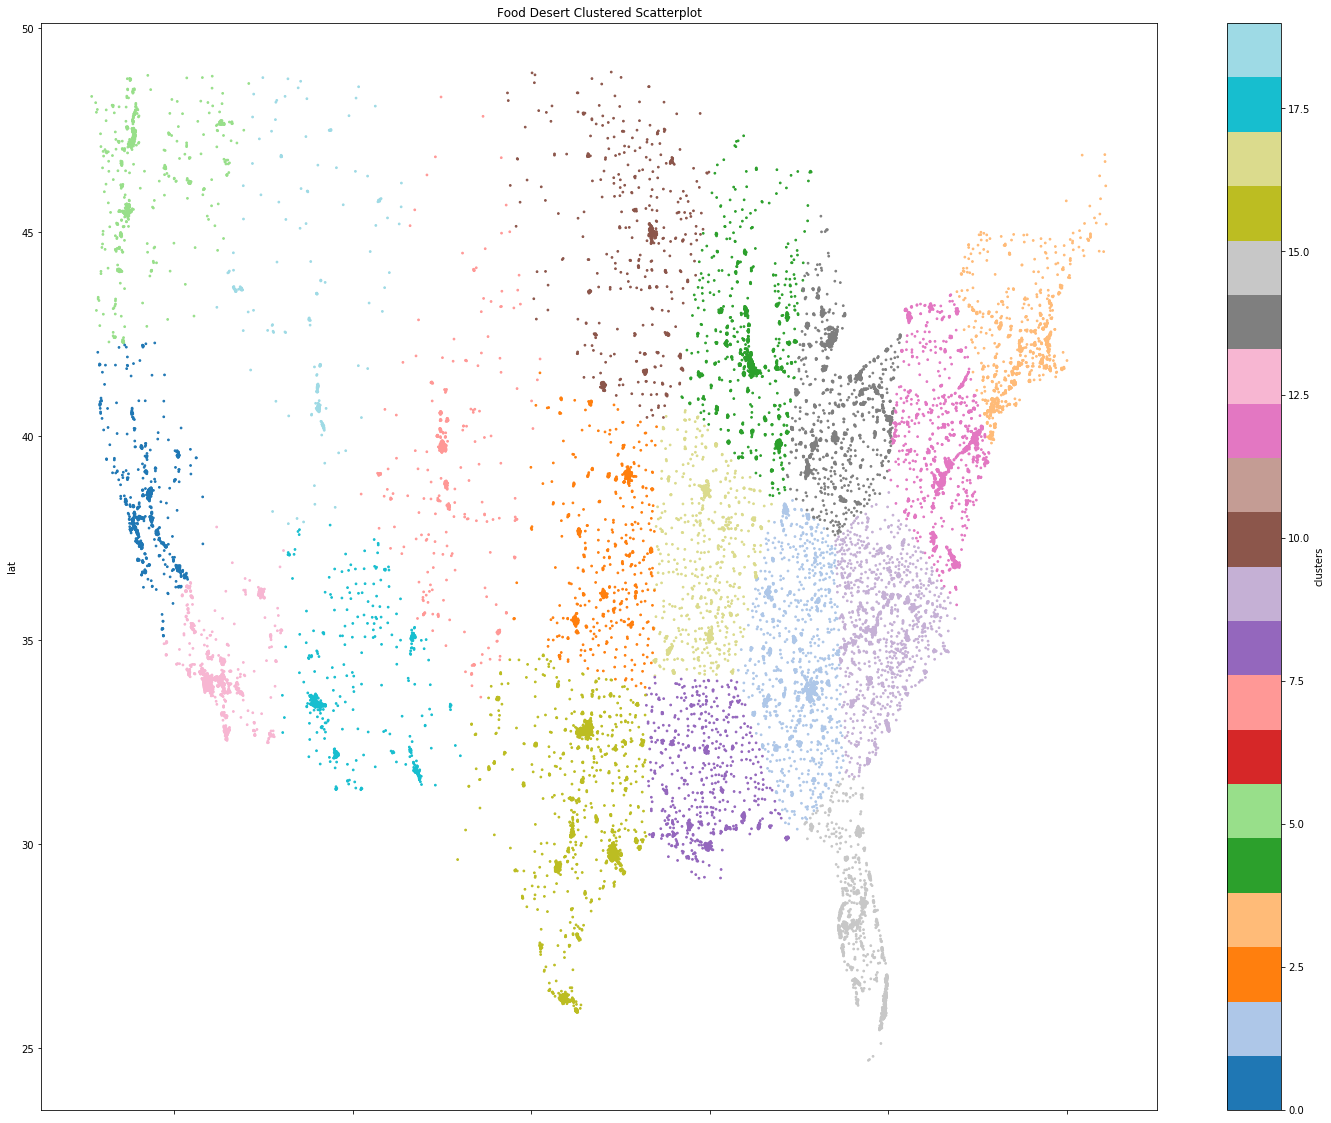

In [75]:
# Plotting Food Desert Tracts by Cluster
mainland[mainland['fd_flag'] == 1].plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'clusters',
              cmap = 'tab20',
              title = 'Food Desert Clustered Scatterplot',
              s = 3,
              figsize = (25,20));

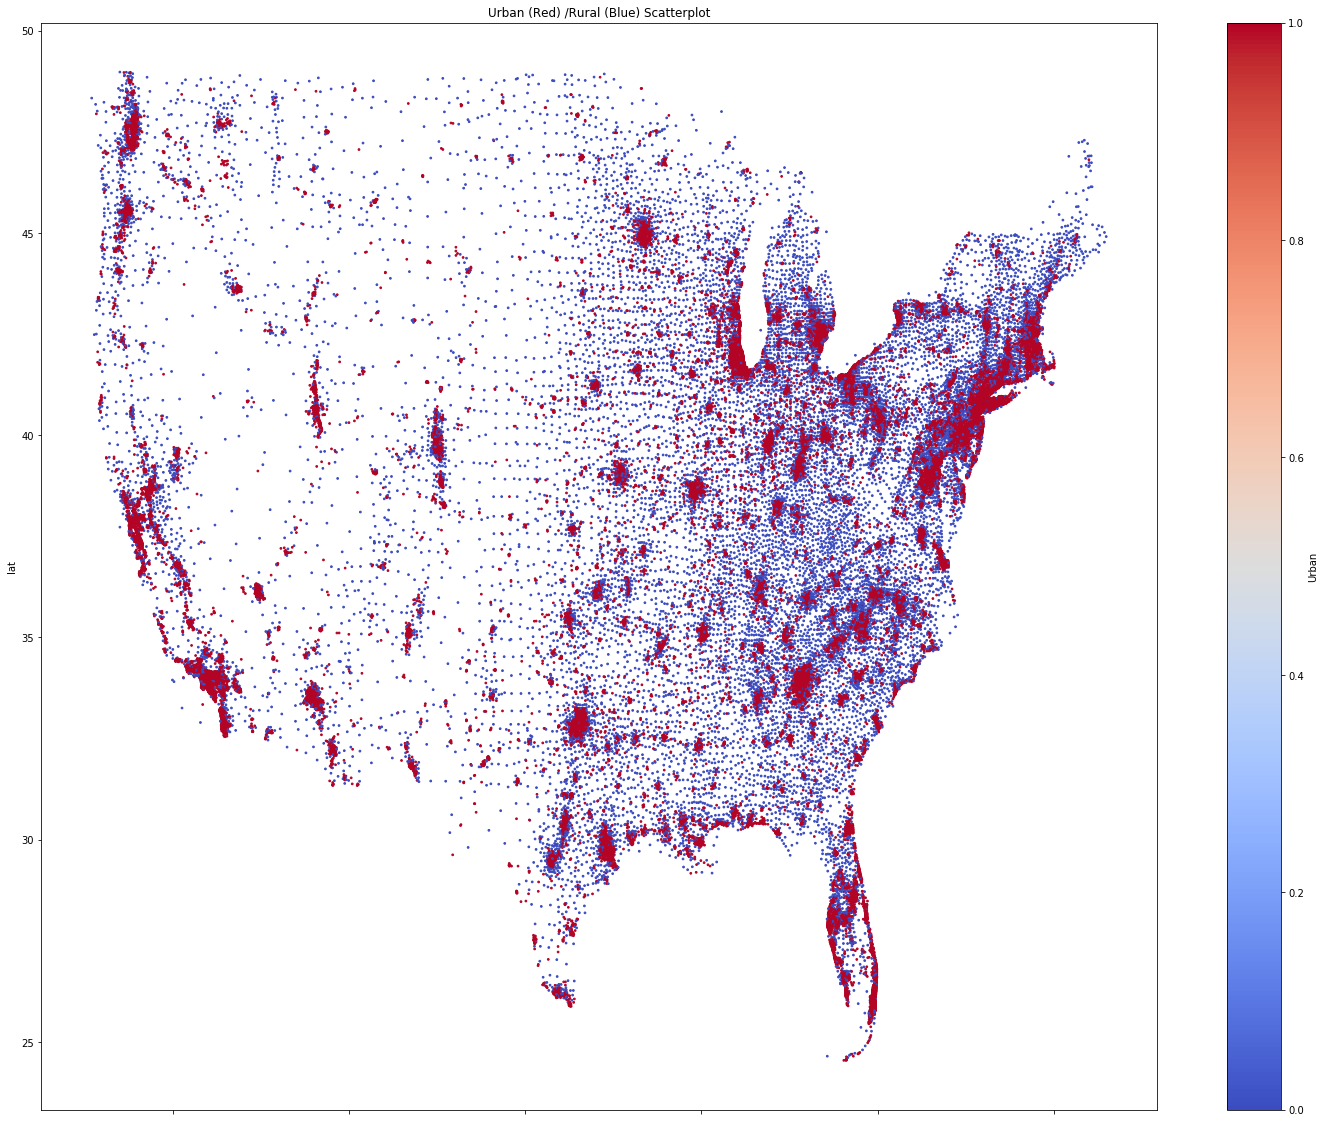

In [152]:
# Plotting Food Desert Tracts by Cluster
mainland.plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'Urban',
              cmap = 'coolwarm',
              title = 'Urban (Red) /Rural (Blue) Scatterplot',
              s = 3,
              figsize = (25,20));

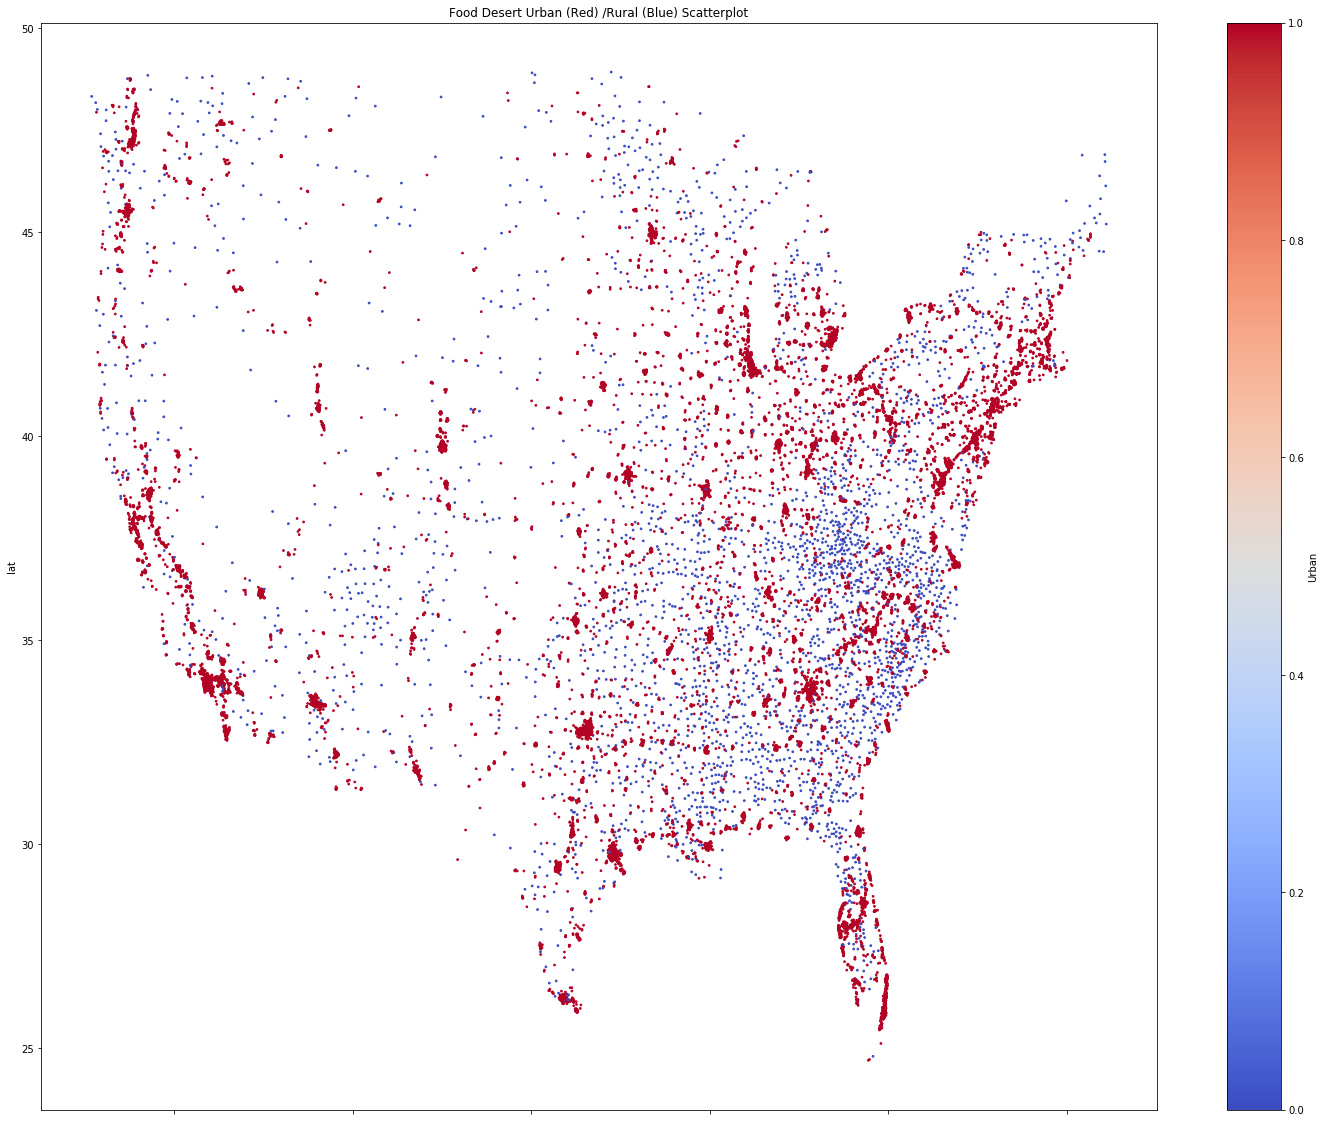

In [153]:
# Plotting Food Desert Tracts by Cluster
mainland[mainland['fd_flag'] == 1].plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'Urban',
              cmap = 'coolwarm',
              title = 'Food Desert Urban (Red) /Rural (Blue) Scatterplot',
              s = 3,
              figsize = (25,20));

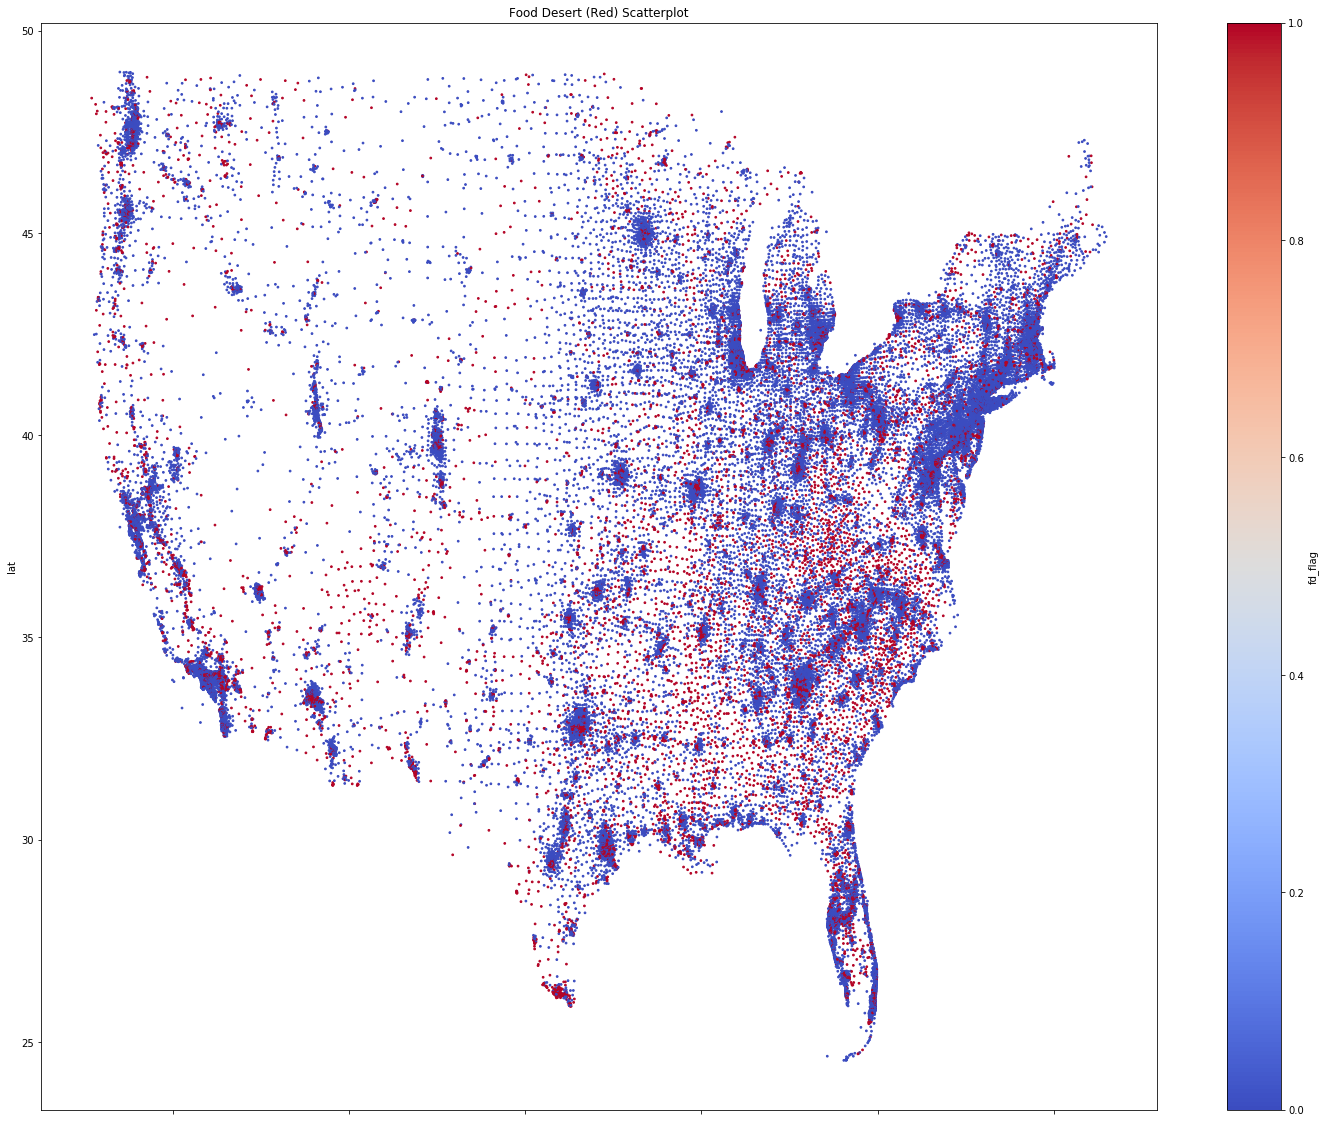

In [154]:
# Plotting Food Desert Tracts by Cluster
mainland.plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'fd_flag',
              cmap = 'coolwarm',
              title = 'Food Desert (Red) Scatterplot',
              s = 3,
              figsize = (25,20));

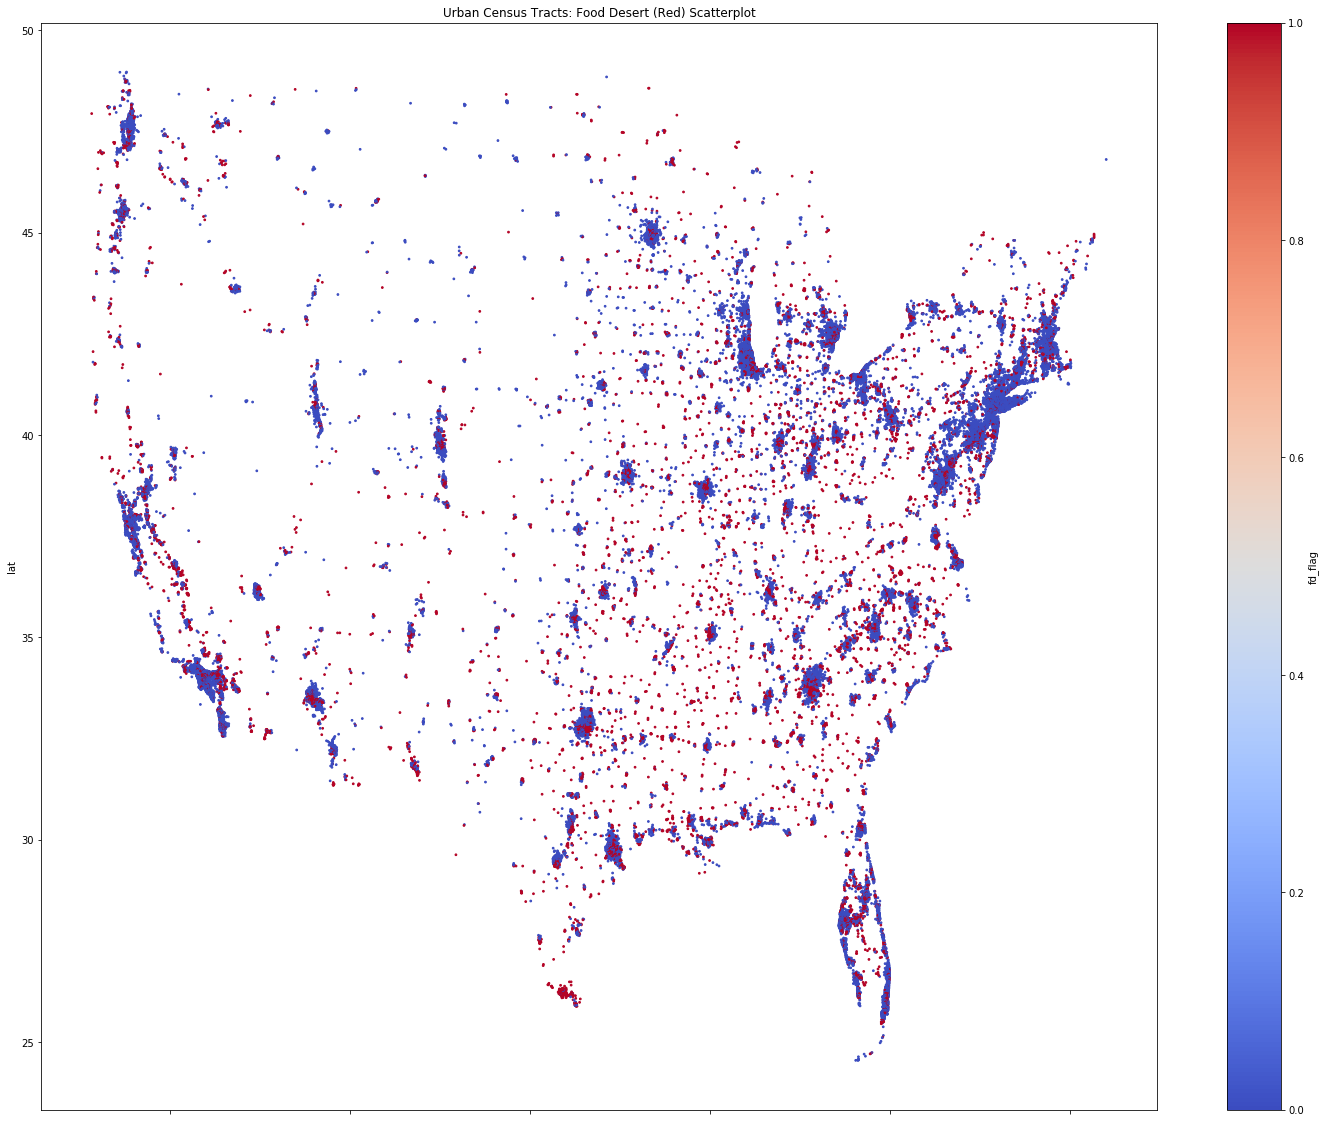

In [155]:
# Plotting Food Desert Tracts by Cluster
mainland[mainland['Urban'] == 1].plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'fd_flag',
              cmap = 'coolwarm',
              title = 'Urban Census Tracts: Food Desert (Red) Scatterplot',
              s = 3,
              figsize = (25,20));

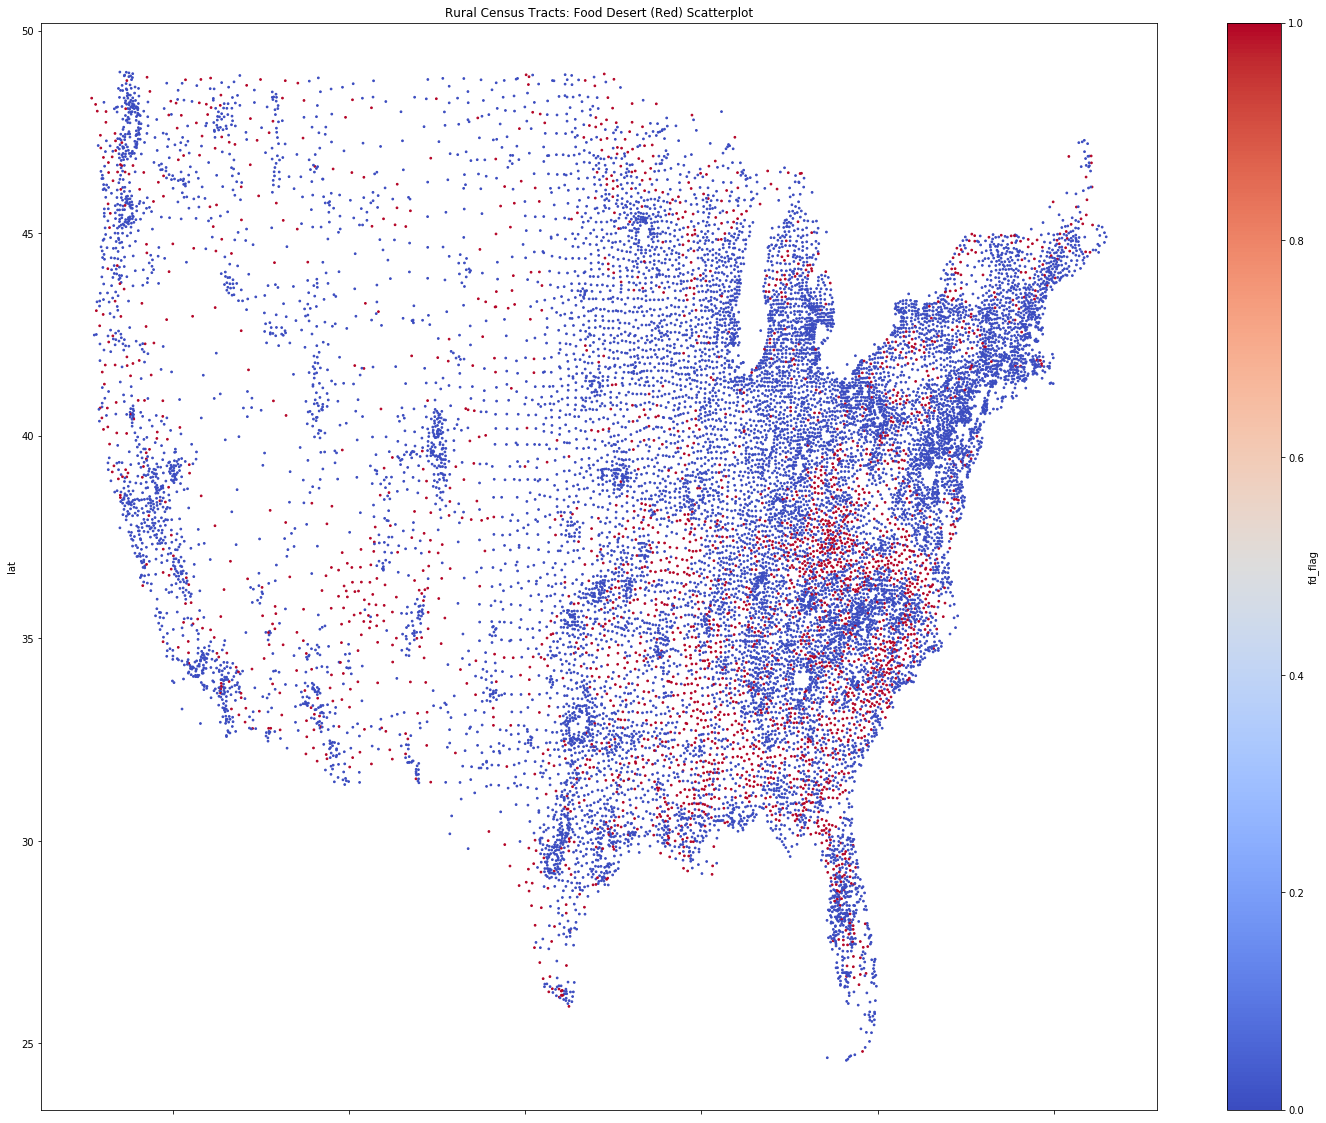

In [156]:
# Plotting Food Desert Tracts by Cluster
mainland[mainland['Urban'] == 0].plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'fd_flag',
              cmap = 'coolwarm',
              title = 'Rural Census Tracts: Food Desert (Red) Scatterplot',
              s = 3,
              figsize = (25,20));

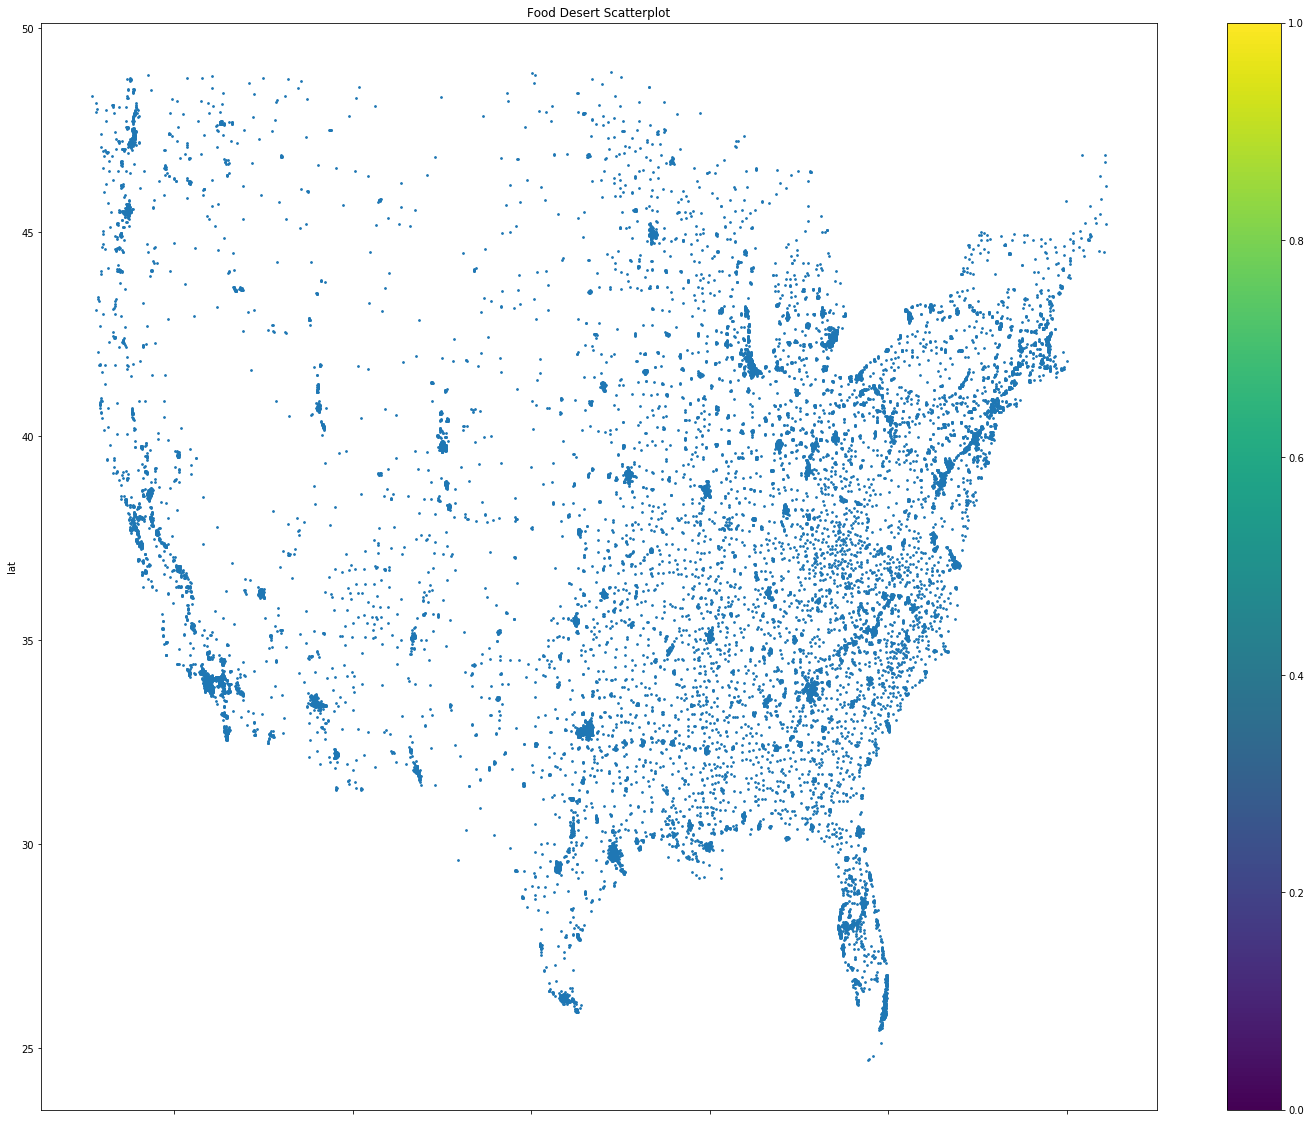

In [145]:
# Plotting Food Desert Tracts by Cluster
mainland[mainland['fd_flag'] == 1].plot(kind = 'scatter' , x= 'lon', y= 'lat',
              cmap = 'coolwarm',
              title = 'Food Desert Scatterplot',
              s = 3,
              figsize = (25,20));

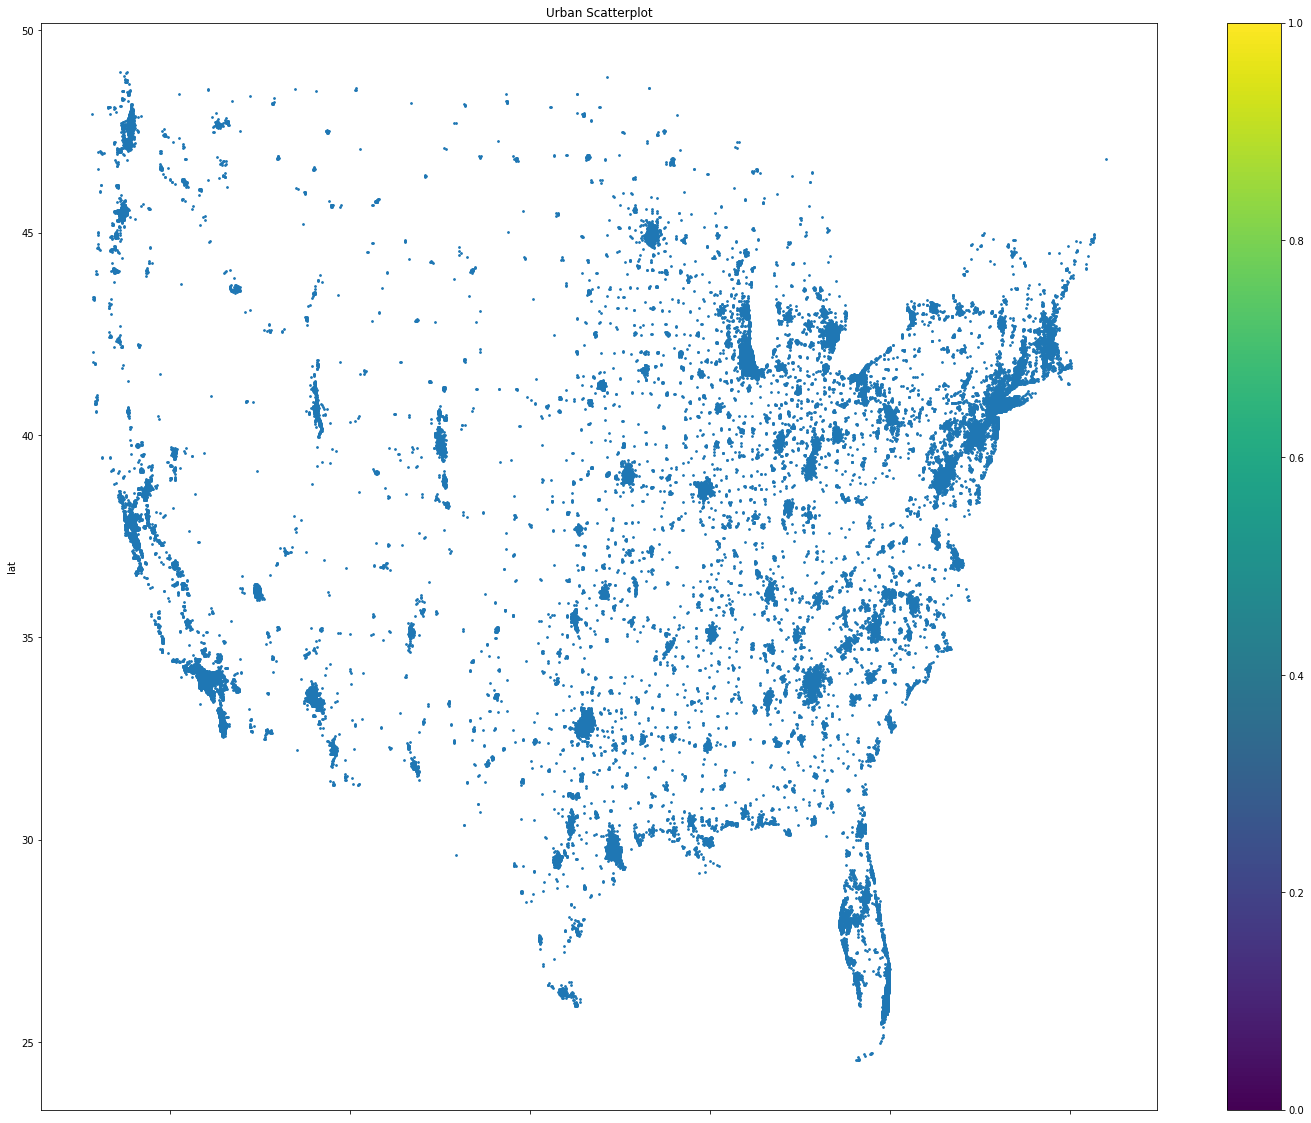

In [146]:
# Plotting Food Desert Tracts by Cluster
mainland[mainland['Urban'] == 1].plot(kind = 'scatter' , x= 'lon', y= 'lat',
              cmap = 'coolwarm',
              title = 'Urban Scatterplot',
              s = 3,
              figsize = (25,20));

### Reading the Maps
#### Urban Concentration
- Food Deserts follow the same clustered distribution as Urban census tracts
    - Applying the Food Desert Flag allows us to see which areas of the city contain food deserts
- Looking at the map of rural Food Deserts shows a concentration of food deserts in the Kentucky/Appalachian region, as well as the Colorado/Southwest regions

### Incorporating Our Modeling Results
- We saw from our Logistic Regression that being in cluster 3, 15, and 4 has strongest effect on a census tract not being classified as a food desert
- Similarly, we saw that clusters 7, 16, and 0 had strongest effects on being classified as a food desert

In [135]:
# Clusters 3, 4, 15
flag = (mainland['clusters'] == 3) | (mainland['clusters'] == 4) | (mainland['clusters'] == 15)
mainland[flag]['State'].value_counts()

Florida          3994
New York         3905
Illinois         2641
Massachusetts    1476
New Jersey       1442
Wisconsin        1194
Indiana          1082
Connecticut       832
Michigan          728
Maine             355
New Hampshire     295
Rhode Island      242
Vermont           184
Iowa              129
Georgia           110
Pennsylvania       26
Name: State, dtype: int64

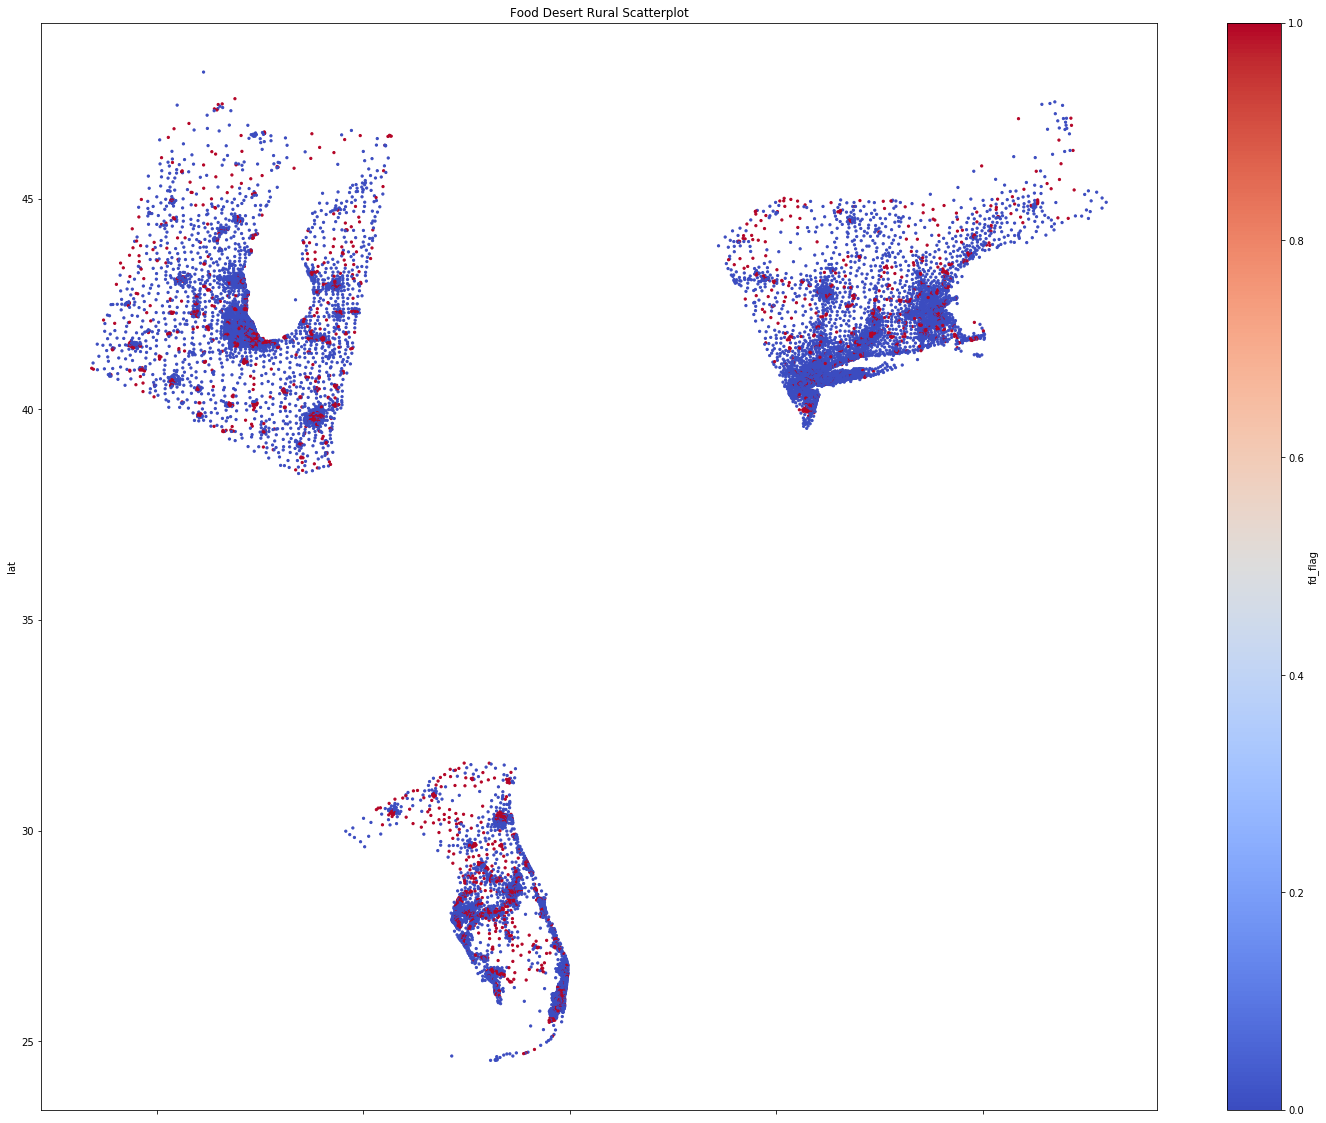

In [92]:
# Plotting Food Desert Tracts by Cluster
mainland[flag].plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'fd_flag',
              cmap = 'coolwarm',
              title = 'Food Desert Rural Scatterplot',
              s = 5,
              figsize = (25,20));

In [133]:
# Clusters 0, 7, 16
flag = (mainland['clusters'] == 0) | (mainland['clusters'] == 7) | (mainland['clusters'] == 16) 

In [134]:
mainland[flag]['State'].value_counts()

Texas           5074
California      3140
Colorado        1244
Nevada           169
New Mexico       125
Louisiana         99
Wyoming           83
Nebraska          66
Oklahoma          58
South Dakota      57
Kansas            44
North Dakota      34
Oregon            31
Montana           26
Arkansas          20
Utah               1
Name: State, dtype: int64

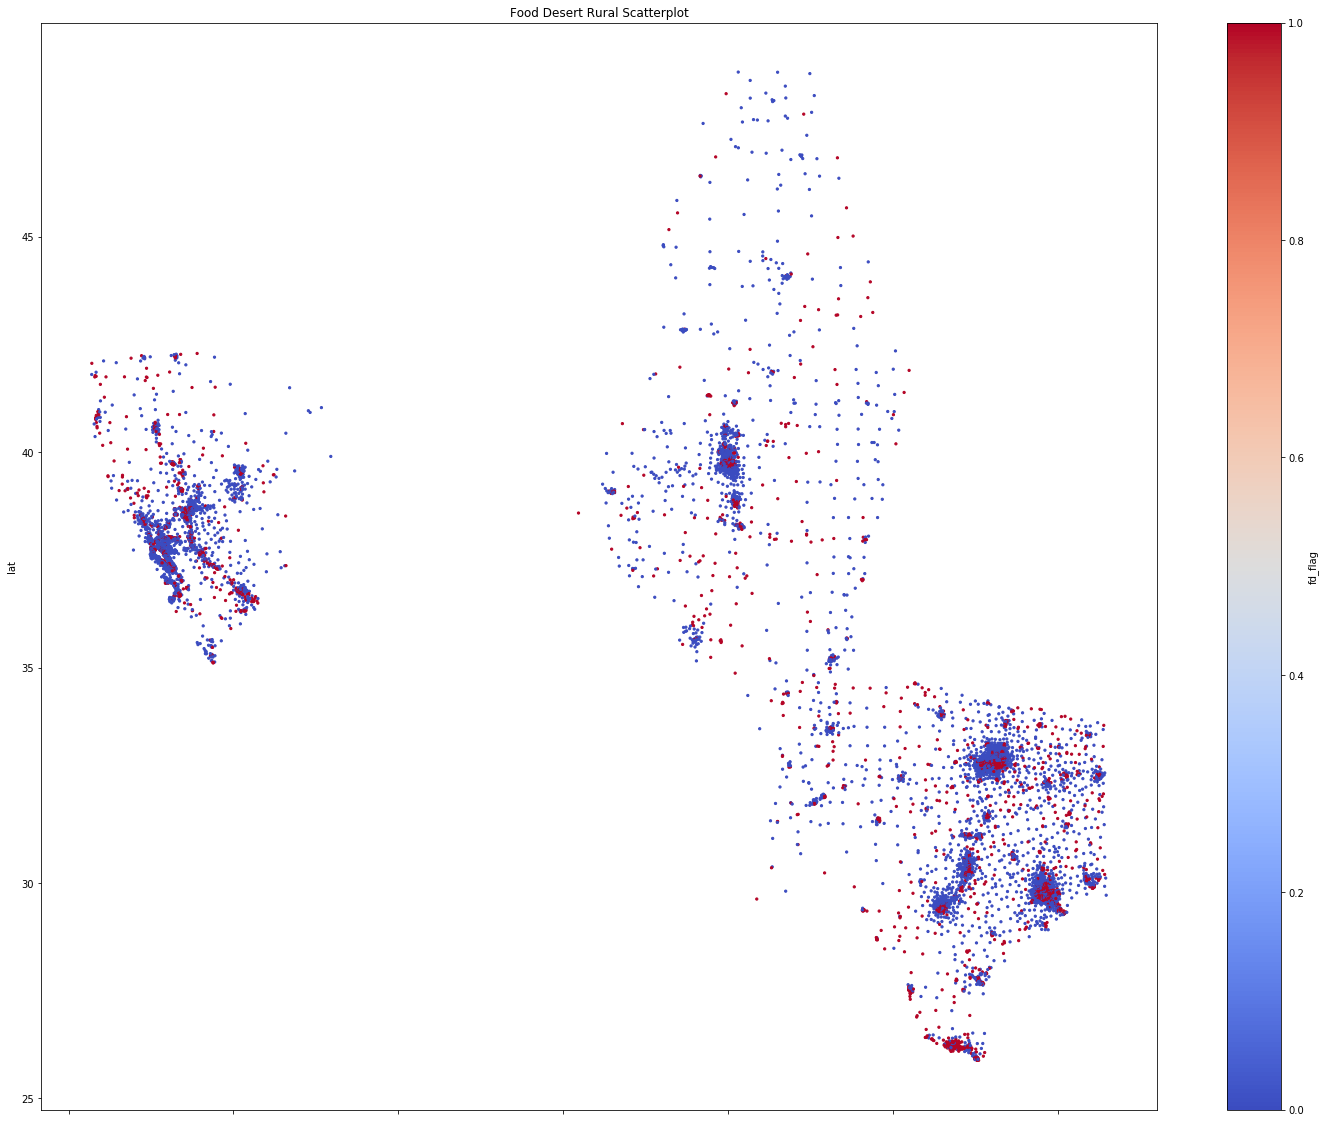

In [94]:
# Plotting Food Desert Tracts by Cluster
mainland[flag].plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'fd_flag',
              cmap = 'coolwarm',
              title = 'Food Desert Rural Scatterplot',
              s = 5,
              figsize = (25,20));